# Subset

In [21]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
import matplotlib.pyplot as plt
import seaborn as sns
print(ad.__version__)

0.11.4


In [22]:
adata = ad.read_h5ad("../h5ad/0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad", backed='r')
print(adata)


AnnData object with n_obs × n_vars = 1058909 × 36169 backed at '..\\h5ad\\0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad'
    obs: 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intronic_reads_counted', 'library_id', 'assay_ontology_term_id', 'sequenced_fragment', 'cell_number_loaded', 'institute', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_id', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_collection_method', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'cell_viability_percentage', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gene', 'TCRa_J_gene', 'TCRa_C_gene', 'TCRb_V_gene'

In [23]:
# Create a subset of the erythrocyte type
erythrocyte = adata[adata.obs['cell_type'] == 'erythrocyte'].to_memory()
print(erythrocyte)

# Print the first few rows of the data .X matrix
print(erythrocyte.X[:5])

# Print the first few rows of the data .raw_X matrix
print(erythrocyte.raw.X[:5])

AnnData object with n_obs × n_vars = 141 × 36169
    obs: 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intronic_reads_counted', 'library_id', 'assay_ontology_term_id', 'sequenced_fragment', 'cell_number_loaded', 'institute', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_id', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_collection_method', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'cell_viability_percentage', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gene', 'TCRa_J_gene', 'TCRa_C_gene', 'TCRb_V_gene', 'TCRb_D_gene', 'TCRb_J_gene', 'TCRb_C_gene', 'TCR_Clonality', 'TCR

Test data created with shape: (100, 50)
Cell types: ['CD4-positive, alpha-beta T cell', 'central memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta memory T cell', 'innate lymphoid cell', 'gamma-delta T cell', 'regulatory T cell', 'double negative T regulatory cell', 'CD8-positive, alpha-beta T cell']
Categories (9, object): ['CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta memory T cell', 'central memory CD4-positive, alpha-beta T cell', ..., 'effector memory CD4-positive, alpha-beta T cell', 'gamma-delta T cell', 'innate lymphoid cell', 'regulatory T cell']
Donors: ['donor4', 'donor1', 'donor3', 'donor5', 'donor2']
Categories (5, object): ['donor1', 'donor2', 'donor3', 'donor4', 'donor5']
Age stages: ['60-year-old stage', '30-year-old stage', '50-year-old stage', '70-year-old stage', '40-year-old stage']
Categories (5, object): ['30-year-old stage', '40-year-old stage', '

c:\Users\Tycho\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\Users\Tycho\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


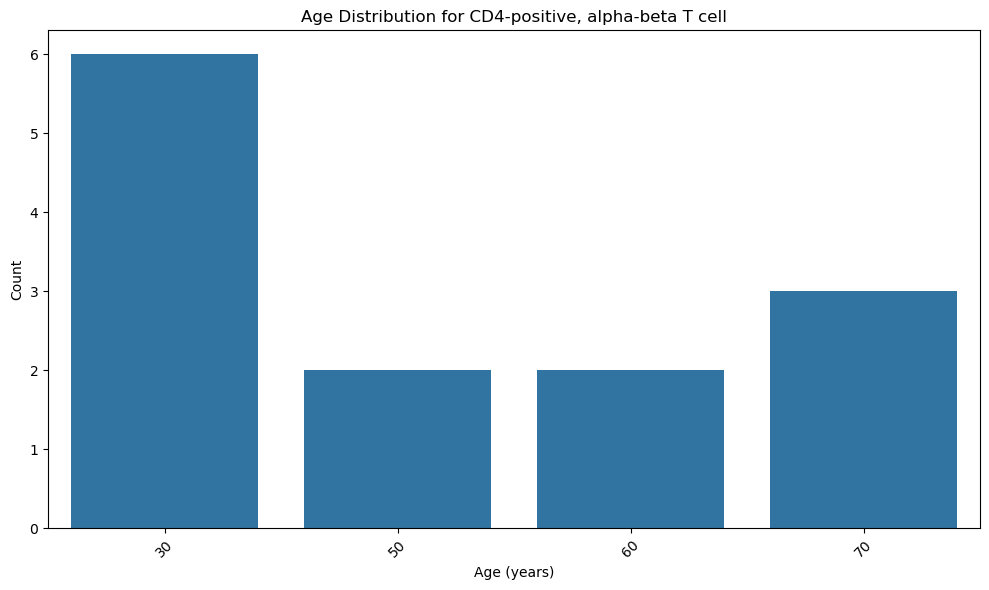

In [24]:
def create_test_data():
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Create a small test dataset with 9 cell types and 5 donors
    n_cells = 100
    n_genes = 50
    
    # Generate random expression data (sparse matrix)
    X = np.random.negative_binomial(5, 0.3, size=(n_cells, (n_genes-2)))
    X = np.concatenate([X, np.zeros((n_cells, 2))], axis=1)  # Add two zero columns
    X = csr_matrix(X)

    cell_type = np.random.choice([
        "CD4-positive, alpha-beta T cell",
        "CD8-positive, alpha-beta memory T cell",
        "CD8-positive, alpha-beta T cell",
        "central memory CD4-positive, alpha-beta T cell",
        "double negative T regulatory cell",
        "effector memory CD4-positive, alpha-beta T cell",
        "gamma-delta T cell",
        "innate lymphoid cell",
        "regulatory T cell"
    ], size=n_cells)
    
    choices_donor_and_age = [('donor1', '30-year-old stage'),
                             ('donor2', '40-year-old stage'),
                             ('donor3', '50-year-old stage'),
                             ('donor4', '60-year-old stage'),
                             ('donor5', '70-year-old stage')]
    
    indexes = np.random.choice(len(choices_donor_and_age), size=n_cells)
    donor_and_age = [choices_donor_and_age[i] for i in indexes]
    donor_and_age = np.array(donor_and_age)

    
    # Create cell metadata
    obs = pd.DataFrame({
        'cell_type': cell_type,
        'donor_id': [donor for donor, _ in donor_and_age],
        'development_stage': [age for _, age in donor_and_age],
    })
    
    # Create gene metadata
    var = pd.DataFrame(index=[f'gene_{i}' for i in range(n_genes)])
    
    # Create the AnnData object
    adata_test = ad.AnnData(X=X, obs=obs, var=var, raw=ad.AnnData(X=X, obs=obs, var=var))
    
    return adata_test

# Create test data
test_data = create_test_data()

# Save to file
test_data.write_h5ad("test_data.h5ad")

# Verify the structure
print("Test data created with shape:", test_data.shape)
print("Cell types:", test_data.obs['cell_type'].unique())
print("Donors:", test_data.obs['donor_id'].unique())
print("Age stages:", test_data.obs['development_stage'].unique())

# Plot age distribution for one cell type to test visualization
# Use a bar graph to visualize the age distribution of a specific cell type
celltype = 'CD4-positive, alpha-beta T cell'
subset = test_data[test_data.obs['cell_type'] == celltype]
string_age = subset.obs['development_stage'].astype(str)
string_age = string_age.str.extract('(\d+)').astype(int).squeeze()
plt.figure(figsize=(10, 6))
sns.countplot(x=string_age, order=sorted(string_age.unique()))
plt.title(f'Age Distribution for {celltype}')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Print the first few rows of the test data
print(test_data.obs.head())
print(test_data.var.head(51))

                                         cell_type donor_id  development_stage
0                  CD4-positive, alpha-beta T cell   donor4  60-year-old stage
1   central memory CD4-positive, alpha-beta T cell   donor1  30-year-old stage
2  effector memory CD4-positive, alpha-beta T cell   donor3  50-year-old stage
3           CD8-positive, alpha-beta memory T cell   donor5  70-year-old stage
4                             innate lymphoid cell   donor3  50-year-old stage
Empty DataFrame
Columns: []
Index: [gene_0, gene_1, gene_2, gene_3, gene_4, gene_5, gene_6, gene_7, gene_8, gene_9, gene_10, gene_11, gene_12, gene_13, gene_14, gene_15, gene_16, gene_17, gene_18, gene_19, gene_20, gene_21, gene_22, gene_23, gene_24, gene_25, gene_26, gene_27, gene_28, gene_29, gene_30, gene_31, gene_32, gene_33, gene_34, gene_35, gene_36, gene_37, gene_38, gene_39, gene_40, gene_41, gene_42, gene_43, gene_44, gene_45, gene_46, gene_47, gene_48, gene_49]


In [26]:
# Print test data .x
print("Test data .x shape:", test_data.X.shape)

for i in range(100):
    # if the donor_id is 1 print the row
    if test_data.obs['donor_id'].iloc[i] == 'donor1':
        # If the cell_type is 'CD14-positive monocyte' print the row
        if test_data.obs['cell_type'].iloc[i] == 'CD14-positive monocyte':
            print(f"Test data .x row {i} (dense):", test_data.X[i].A.flatten())

Test data .x shape: (100, 50)


In [27]:
# Print the first 10 rows of the test data .X
print("First 10 rows of test data .X (dense):")
for i in range(10):
    print(test_data.X[i].A.flatten())
    print(test_data.raw.X[i].A.flatten())

First 10 rows of test data .X (dense):
[15. 11.  7. 13.  7.  6. 12. 10.  7. 20.  6.  9.  5. 21. 17. 18.  6. 11.
  9. 22. 21. 17.  4.  6. 16.  9.  4.  8. 20. 22.  7. 15. 19. 16. 17. 16.
 10. 18. 12.  5.  4. 10. 10. 19.  8. 11. 23.  3.  0.  0.]
[15. 11.  7. 13.  7.  6. 12. 10.  7. 20.  6.  9.  5. 21. 17. 18.  6. 11.
  9. 22. 21. 17.  4.  6. 16.  9.  4.  8. 20. 22.  7. 15. 19. 16. 17. 16.
 10. 18. 12.  5.  4. 10. 10. 19.  8. 11. 23.  3.  0.  0.]
[12.  8.  8. 10. 14. 19. 22. 13. 13.  8. 22. 15.  5. 11. 18. 11. 11.  4.
  5. 17.  9. 21.  7. 17. 11. 15.  6. 14.  6. 18. 16. 11. 11. 12.  5. 11.
  5.  9.  6.  2. 10. 10.  6.  3. 12. 15.  8.  7.  0.  0.]
[12.  8.  8. 10. 14. 19. 22. 13. 13.  8. 22. 15.  5. 11. 18. 11. 11.  4.
  5. 17.  9. 21.  7. 17. 11. 15.  6. 14.  6. 18. 16. 11. 11. 12.  5. 11.
  5.  9.  6.  2. 10. 10.  6.  3. 12. 15.  8.  7.  0.  0.]
[ 1. 29.  7.  5.  6. 13. 11. 19. 17. 10. 10.  9.  8. 26. 15. 11. 15. 18.
 13. 10. 10. 34.  8. 10.  9. 13. 23.  7. 11. 11.  6. 16. 11.  6.  6. 20.

In [2]:
# Load subsets/CD14-positive monocyte_old_donors.h5ad
adata = ad.read_h5ad("CD14-positive monocyte_young_donors.h5ad")

In [3]:
# Print the .x data of the first column
print("Subsets .x shape:", adata.X.shape)
adata.X[:, 0]

Subsets .x shape: (2, 48)


array([8.33333333, 7.28571429])

In [4]:
# Print metadata
print("Subsets metadata shape:", adata.obs.shape)
print("Subsets metadata:", adata.obs.head())

Subsets metadata shape: (2, 3)
Subsets metadata:                        cell_type        development_stage  n_cells
donor_id                                                          
donor2    CD14-positive monocyte  35-year-old human stage        6
donor1    CD14-positive monocyte  30-year-old human stage        7
